In [2]:
pwd

'C:\\Users\\jeong\\proj\\nlp_paper\\py'

In [7]:
%run goog_news_v2.py


    goog_news('wti price',201908,pages=3)
    


In [8]:
mms = pd.date_range('2007-01','2019-09',freq='MS').strftime('%Y%m').tolist()
mms.reverse()

In [9]:
s = time.time()
oil_news1 = []
for i,m in enumerate(mms):
    try:
        news = goog_news('oil price',m)
        oil_news1.append(news)
    except:
        print('error on',m)
    if i>0 :
        if mms[i-1][:4] != m[:4]:
            print(mms[i-1][:4],' done')
e = time.time() - s
time.strftime('%H:%M:%S',time.gmtime(e))

2019  done
2018  done
2017  done
2016  done
2015  done
2014  done
2013  done
2012  done
2011  done
2010  done
2009  done
2008  done


'03:15:22'

In [10]:
oilnews = pd.concat(oil_news1,axis=0,ignore_index=True)

In [11]:
oilnews.shape

(4265, 7)

In [13]:
oilnews.to_csv('c:/users/jeong/proj/nlp_paper/data/oilnews_200701_201909_p3.csv')

In [14]:
on = oilnews.copy()

In [15]:
on.head()

,mon,keyword,result_n,date,press,title,text
0,201909,oil price,5320000.0,2019-09-15,BBC News,Oil prices soar after attacks on Saudi facilities,Media playback is unsupported on your device M...
1,201909,oil price,5320000.0,2019-09-17,The New York Times,How an Oil Price Surge Could Hurt the U.S. Eco...,"For months, American consumers have kept the e..."
2,201909,oil price,5320000.0,2019-09-15,Deutsche Welle,Saudi attacks: Oil price to spike as productio...,Global oil prices are set to rise sharply afte...
3,201909,oil price,5320000.0,2019-09-17,BBC News,Oil price falls as Saudi Arabia calms supply f...,Image copyright AFP Image caption Prince Abdul...
4,201909,oil price,5320000.0,2019-09-16,The New York Times,"After Saudi Attack, Oil Market Is on Edge: ‘Wh...",HOUSTON — Fixing the damage done by the attack...


In [23]:
on1 = on.groupby('mon').text.sum().to_frame('news').reset_index()

In [26]:
on1.head()

,mon,news,newslen
0,200701,"ISLAMABAD, Jan 15: The government on Monday sl...",206196
1,200702,Meters Cost Iraq Billions In Stolen Oil\n\n\n\...,201099
2,200703,When an angry Enrico Mattei coined the phrase ...,250112
3,200704,By Randy Fabi - Analysis\n\nA man walks past a...,247080
4,200705,NEW YORK (CNNMoney.com) -- It's easy to hate B...,214732


In [25]:
on1['newslen'] = on1.news.apply(lambda x: len(x))

In [51]:
wti = pd.read_pickle('../data/wti.pkl')

In [55]:
wti.head()

,date,value,prng,mon
0,2007-01-31,54.777826,50,200701
1,2007-02-28,59.257000,50,200702
2,2007-03-31,60.601818,70,200703
3,2007-04-30,63.952857,70,200704
4,2007-05-31,63.507391,70,200705


In [53]:
wti.date = pd.to_datetime(wti.date)

In [54]:
wti['mon'] = wti.date.dt.strftime('%Y%m')

In [56]:
on2 = on1.merge(wti[['mon','prng','value']],how='left',on='mon')

In [75]:
pwd

'C:\\Users\\jeong\\proj\\nlp_paper\\py'

In [79]:
on2.to_csv('../data/oilnews_monthly.csv',index=False)

In [76]:
on2.to_pickle('../data/oilnews_monthly.pkl')

In [77]:
onm = pd.read_pickle('../data/oilnews_monthly.pkl')

In [78]:
onm.head()

,mon,news,newslen,prng,value
0,200701,"ISLAMABAD, Jan 15: The government on Monday sl...",206196,50,54.777826
1,200702,Meters Cost Iraq Billions In Stolen Oil\n\n\n\...,201099,50,59.257000
2,200703,When an angry Enrico Mattei coined the phrase ...,250112,70,60.601818
3,200704,By Randy Fabi - Analysis\n\nA man walks past a...,247080,70,63.952857
4,200705,NEW YORK (CNNMoney.com) -- It's easy to hate B...,214732,70,63.507391


In [57]:
on2.head()

,mon,news,newslen,prng,value
0,200701,"ISLAMABAD, Jan 15: The government on Monday sl...",206196,50,54.777826
1,200702,Meters Cost Iraq Billions In Stolen Oil\n\n\n\...,201099,50,59.257000
2,200703,When an angry Enrico Mattei coined the phrase ...,250112,70,60.601818
3,200704,By Randy Fabi - Analysis\n\nA man walks past a...,247080,70,63.952857
4,200705,NEW YORK (CNNMoney.com) -- It's easy to hate B...,214732,70,63.507391


In [31]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [72]:
from nltk.tokenize import word_tokenize

In [71]:
!pip install nltk

In [80]:
pwd

'C:\\Users\\jeong\\proj\\nlp_paper\\py'

In [81]:
genmod = Doc2Vec.load('../data/oilnws_model.model')

In [84]:
genmod.docvecs[0].shape

(100,)

In [91]:
on2.shape

(153, 5)

In [93]:
on2.prng.value_counts().sort_index()

10      0
30      5
50     49
70     35
90     39
110    21
130     3
Name: prng, dtype: int64

In [106]:
on2.prng.drop_duplicates().sort_values()

25      30
0       50
2       70
9       90
14     110
16     130
152    NaN
Name: prng, dtype: category
Categories (7, object): [10, 30, 50, 70, 90, 110, 130]

In [99]:
tags = on2.prng.drop_duplicates().tolist()

In [103]:
tags = tags[:-1]

In [107]:
sorted(tags)

['110', '130', '30', '50', '70', '90']

In [108]:
tags.sort()

In [109]:
tags

['110', '130', '30', '50', '70', '90']

In [112]:
dvec = pd.DataFrame([genmod.docvecs[i] for i in tags],columns=['v'+str(j+1) for j in range(100)])

In [114]:
dvec['prng'] = tags

In [115]:
dvec = dvec[['prng']+['v'+str(j+1) for j in range(100)]]

In [116]:
dvec

,prng,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100
0,110,-0.173446,2.276710,2.411576,-2.138502,1.069422,1.670758,-0.853905,0.450209,0.041722,...,0.873071,1.480928,0.354894,-3.154051,0.243246,1.992154,1.526528,-1.862957,-1.831815,-2.383479
1,130,1.073307,1.899687,1.922077,-3.080845,1.341834,2.372437,-0.339808,0.035274,0.260299,...,-2.004223,1.339669,-1.581989,-0.661579,-1.307903,0.340382,0.876824,0.794340,0.903864,-1.110535
2,30,-1.004726,1.191682,-0.353783,-0.958464,1.090957,0.426506,0.691695,-0.335180,0.590543,...,-0.320145,0.152107,-0.439600,-1.589861,-0.174508,0.819696,1.657981,1.788971,1.807509,-3.314196
3,50,-2.709875,0.137137,0.211268,-2.771160,1.584105,-0.821538,-1.192032,-1.358568,-0.477770,...,-0.593559,0.792861,2.122578,-3.070414,0.293204,1.300541,0.428160,-0.660433,-0.269373,-3.640851
4,70,-3.540743,5.519597,1.135055,-2.868148,1.124877,1.276209,-1.070617,1.652500,2.332398,...,-0.894414,-1.093800,-3.131987,2.627597,1.155030,0.289684,-0.914648,1.563743,-0.937724,-0.314720
5,90,2.845057,0.083692,-0.575159,-3.740852,-0.363251,4.170525,-0.548630,2.270066,0.293439,...,-2.163257,-0.061929,-1.040851,-1.400429,-2.640333,-0.211279,0.285488,1.682063,1.756281,0.456419


In [122]:
on2.dtypes

mon         object
news        object
newslen      int64
prng        object
value      float64
dtype: object

In [121]:
on2.prng = on2.prng.astype('str')

In [123]:
dvec.columns[:3]

Index(['prng', 'v1', 'v2'], dtype='object')

In [124]:
on3 = on2.merge(dvec,how='left',on='prng')

In [144]:
on3.to_pickle('../data/on3.pkl')

In [126]:
on3.head(3)

,mon,news,newslen,prng,value,v1,v2,v3,v4,v5,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100
0,200701,"ISLAMABAD, Jan 15: The government on Monday sl...",206196,50,54.777826,-2.709875,0.137137,0.211268,-2.771160,1.584105,...,-0.593559,0.792861,2.122578,-3.070414,0.293204,1.300541,0.428160,-0.660433,-0.269373,-3.640851
1,200702,Meters Cost Iraq Billions In Stolen Oil\n\n\n\...,201099,50,59.257000,-2.709875,0.137137,0.211268,-2.771160,1.584105,...,-0.593559,0.792861,2.122578,-3.070414,0.293204,1.300541,0.428160,-0.660433,-0.269373,-3.640851
2,200703,When an angry Enrico Mattei coined the phrase ...,250112,70,60.601818,-3.540743,5.519597,1.135055,-2.868148,1.124877,...,-0.894414,-1.093800,-3.131987,2.627597,1.155030,0.289684,-0.914648,1.563743,-0.937724,-0.314720


In [127]:
pwd

'C:\\Users\\jeong\\proj\\nlp_paper\\py'

In [128]:
on3.to_csv('../data/oilnws_vec.csv',index=False)

In [129]:
on3.shape

(153, 105)

r에서 v1~v100을 주성분분석해서 주성분 서너개만 남긴 후 plotly로 시각화 해본다 

In [130]:
genmod.docvecs.most_similar('50')

[('30', 0.5799899697303772),
 ('nan', 0.5481147766113281),
 ('130', 0.1885058432817459),
 ('110', 0.17547118663787842),
 ('70', 0.10351657122373581),
 ('90', 0.10347451269626617)]

In [131]:
import seaborn as sns

In [142]:
sdf = on3[['v'+str(i) for i in np.arange(1,5)]]

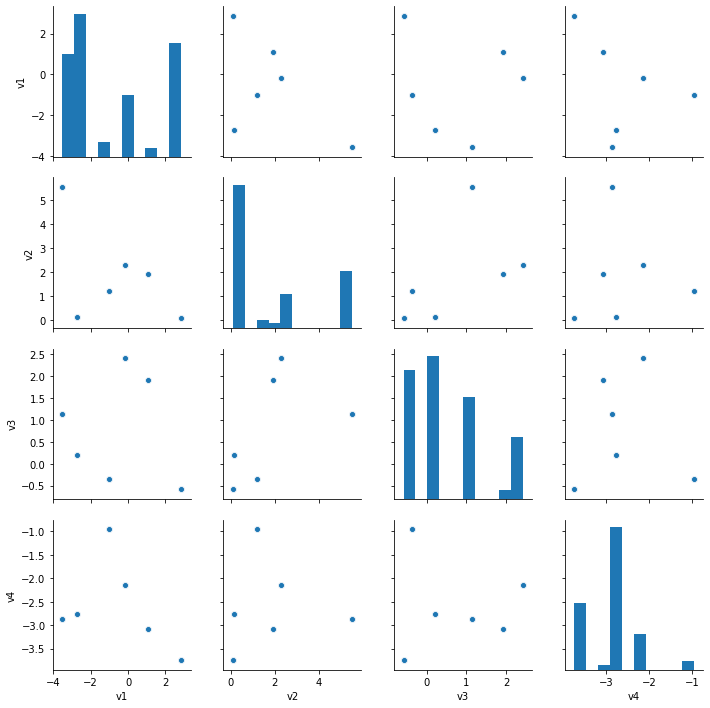

In [143]:
sns.pairplot(sdf)

In [1]:
pwd

'C:\\Users\\jeong\\proj\\nlp_paper\\py'

In [26]:
%run goog_news_v2.py


    goog_news('wti price',201908,pages=3)
    


In [27]:
s = time.time()
gdnws = goog_news('gold price',201909,3)
e = time.time()
time.strftime('%H:%M:%S',time.gmtime(e))

C:\Users\jeong\proj\nlp_paper\py\goog_news_v2.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  '''txt는 문자열(str)


'03:15:01'

In [28]:
gdnws.shape

(28, 8)

In [30]:
gdnws.gurl[0]

'https://www.google.com/search?q=gold+price&safe=active&rlz=1C1SQJL_koKR867KR867&tbs=cdr:1,cd_min:09/01/2019,cd_max:09/30/2019&tbm=nws&ei=lZieXfvHPNXKmAXR7Y2IDw&start=20&sa=N&ved=0ahUKEwi75pre05DlAhVVJaYKHdF2A_E4ChDy0wMIVw&biw=1350&bih=616&dpr=1'

In [5]:
url = "https://www.google.com/search?q=gold+price&rlz=1C1SQJL_koKR867KR867&tbs=cdr:1,cd_min:9/1/2019,cd_max:9/30/2019&tbm=nws&ei=lZieXfvHPNXKmAXR7Y2IDw&start=0&sa=N&ved=0ahUKEwi75pre05DlAhVVJaYKHdF2A_E4ChDy0wMIVw&biw=1350&bih=616&dpr=1"

In [6]:
url.split('&')

['https://www.google.com/search?q=gold+price',
 'rlz=1C1SQJL_koKR867KR867',
 'tbs=cdr:1,cd_min:9/1/2019,cd_max:9/30/2019',
 'tbm=nws',
 'ei=lZieXfvHPNXKmAXR7Y2IDw',
 'start=0',
 'sa=N',
 'ved=0ahUKEwi75pre05DlAhVVJaYKHdF2A_E4ChDy0wMIVw',
 'biw=1350',
 'bih=616',
 'dpr=1']

In [11]:
gdnws.gurl[0].split('&')

['https://www.google.com/search?q=gold+price',
 'safe=active',
 'rlz=1C1SQJL_koKR867KR867',
 'tbs=cdr:1,cd_min:09/01/2019,cd_max:09/30/2019',
 'tbm=nws',
 'sxsrf=ACYBGNSxgR5rrwDaqHy_nhgv9LUmyBADLw:1570601884589',
 'ei=nHudXffRI4uHr7wPlJ-V8Ak',
 'start=20']

In [14]:
quo_word = 'gold+price'
mrng = ['9/1/2019','9/30/2019']
i=10

In [15]:
url = [f'https://www.google.com/search?q={quo_word}',
       'safe=active',
       'rlz=1C1SQJL_koKR867KR867',
       f'tbs=cdr:1,cd_min:{mrng[0]},cd_max:{mrng[1]}',
       'tbm=nws',
       'ei=lZieXfvHPNXKmAXR7Y2IDw',
       f'start={i}',
       'sa=N',
       'ved=0ahUKEwi75pre05DlAhVVJaYKHdF2A_E4ChDy0wMIVw',
       'biw=1350',
       'bih=616',
       'dpr=1']
url = '&'.join(url)
url

'https://www.google.com/search?q=gold+price&safe=active&rlz=1C1SQJL_koKR867KR867&tbs=cdr:1,cd_min:9/1/2019,cd_max:9/30/2019&tbm=nws&ei=lZieXfvHPNXKmAXR7Y2IDw&start=10&sa=N&ved=0ahUKEwi75pre05DlAhVVJaYKHdF2A_E4ChDy0wMIVw&biw=1350&bih=616&dpr=1'

In [31]:
import glob

In [33]:
[a.replace('\\','/') for a in glob.glob('../data/oilnews_monthly*')]

['../data/oilnews_monthly.csv', '../data/oilnews_monthly.pkl']

In [34]:
onmp = pd.read_pickle('../data/oilnews_monthly.pkl')

In [40]:
onmp.tail()

,mon,news,newslen,prng,value
148,201905,New York (CNN Business) Oil prices climbed on ...,89802,70,60.733478
149,201906,London (CNN Business) Crude oil futures surged...,74611,50,54.677000
150,201907,Become an FT subscriber to read:\n\nLeverage o...,88965,50,57.508696
151,201908,President Donald Trump signed an executive ord...,110119,50,54.839091
152,201909,Media playback is unsupported on your device M...,97669,nan,NaN


In [42]:
onmp = onmp.dropna()

In [43]:
onmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 5 columns):
mon        152 non-null object
news       152 non-null object
newslen    152 non-null int64
prng       152 non-null object
value      152 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.1+ KB


In [37]:
onmp.prng = onmp.prng.astype('str')

In [44]:
onmp.to_pickle('../data/onmp.pkl')

In [45]:
onmp.isna().sum()

mon        0
news       0
newslen    0
prng       0
value      0
dtype: int64

In [46]:
onmp.tail()

,mon,news,newslen,prng,value
147,201904,US warns any country not complying that ‘the r...,77927,70,63.875909
148,201905,New York (CNN Business) Oil prices climbed on ...,89802,70,60.733478
149,201906,London (CNN Business) Crude oil futures surged...,74611,50,54.677000
150,201907,Become an FT subscriber to read:\n\nLeverage o...,88965,50,57.508696
151,201908,President Donald Trump signed an executive ord...,110119,50,54.839091


In [49]:
%run goog_news_v2.py


    goog_news('wti price',201908,pages=3)
     wc(df.text.sum())
    


In [50]:
import seaborn as sns
%matplotlib inline

In [60]:
onmp.dtypes

mon                object
news               object
newslen             int64
prng                int32
value             float64
date       datetime64[ns]
dtype: object

In [82]:
onmp.tail()

,mon,news,newslen,prng,value,date,yr
147,201904,US warns any country not complying that ‘the r...,77927,70,63.875909,2019-04-01,2019
148,201905,New York (CNN Business) Oil prices climbed on ...,89802,70,60.733478,2019-05-01,2019
149,201906,London (CNN Business) Crude oil futures surged...,74611,50,54.677000,2019-06-01,2019
150,201907,Become an FT subscriber to read:\n\nLeverage o...,88965,50,57.508696,2019-07-01,2019
151,201908,President Donald Trump signed an executive ord...,110119,50,54.839091,2019-08-01,2019


In [90]:
onmp = onmp.reset_index()

In [91]:
onmp.to_pickle('../data/onmp.pkl')

In [56]:
onmp.prng = onmp.prng.astype(int)

In [58]:
onmp['date'] = pd.to_datetime(onmp.mon,format='%Y%m')

In [64]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Text(0.5, 1.0, 'oil price real trend')

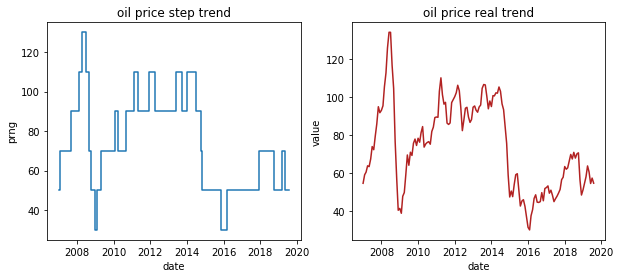

In [86]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.lineplot('date','prng',data=onmp,drawstyle='steps-pre',ax=ax[0])
sns.lineplot('date','value',data=onmp,ax=ax[1],color='firebrick')
ax[0].set_title('oil price step trend')
ax[1].set_title('oil price real trend')

In [89]:
onmp.to_csv('../data/onmp.csv',index=False)

In [68]:
onmp['yr'] = onmp.date.dt.year

In [78]:
yrnws = onmp.groupby('yr').news.sum().tolist()

In [79]:
type(yrnws)

list

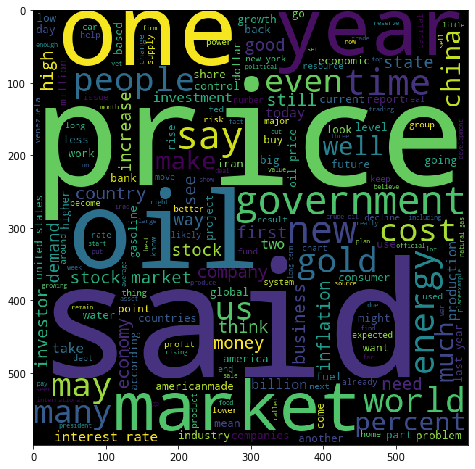

In [80]:
wc(yrnws[0])

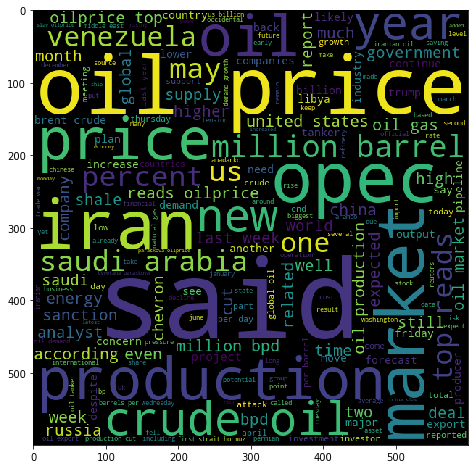

In [81]:
wc(yrnws[-1])

In [92]:
onmp.head()

,index,mon,news,newslen,prng,value,date,yr
0,0,200701,"ISLAMABAD, Jan 15: The government on Monday sl...",206196,50,54.777826,2007-01-01,2007
1,1,200702,Meters Cost Iraq Billions In Stolen Oil\n\n\n\...,201099,50,59.257000,2007-02-01,2007
2,2,200703,When an angry Enrico Mattei coined the phrase ...,250112,70,60.601818,2007-03-01,2007
3,3,200704,By Randy Fabi - Analysis\n\nA man walks past a...,247080,70,63.952857,2007-04-01,2007
4,4,200705,NEW YORK (CNNMoney.com) -- It's easy to hate B...,214732,70,63.507391,2007-05-01,2007


In [94]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [95]:
modm = Doc2Vec.load('../data/oilnws_model_m.model')

In [101]:
modm.wv.similar_by_word('gold',topn=5)

[('Gold', 0.6588617563247681),
 ('silver', 0.5985684394836426),
 ('metal', 0.5771517753601074),
 ('Barrick', 0.5456973910331726),
 ('copper', 0.5201038122177124)]

In [104]:
modm.wv.most_similar?

Signature:
modm.wv.most_similar(
    positive=None,
    negative=None,
    topn=10,
    restrict_vocab=None,
    indexer=None,
)
Docstring:
Find the top-N most similar words.
Positive words contribute positively towards the similarity, negative words negatively.

This method computes cosine similarity between a simple mean of the projection
weight vectors of the given words and the vectors for each word in the model.
The method corresponds to the `word-analogy` and `distance` scripts in the original
word2vec implementation.

Parameters
----------
positive : list of str, optional
    List of words that contribute positively.
negative : list of str, optional
    List of words that contribute negatively.
topn : int or None, optional
    Number of top-N similar words to return, when `topn` is int. When `topn` is None,
    then similarities for all words are returned.
restrict_vocab : int, optional
    Optional integer which limits the range of vectors which
    are searched for most-simila

In [109]:
modm.wv.most_similar(positive=['oil'],negative=['Saudi'])

[('Tar', 0.343402624130249),
 ('Arabia', 0.34265050292015076),
 ('softened', 0.32946479320526123),
 ('Oil', 0.3192172646522522),
 ('FOB', 0.318793922662735),
 ('riyal', 0.309958279132843),
 ('tar', 0.3095785975456238),
 ('continually', 0.29976537823677063),
 ('oil—the', 0.29307013750076294),
 ('snow', 0.29220786690711975)]

### docvec model analysis

In [151]:
# model1 = 가격수준을 tags로 하여 적합시킨 모델, 가격대가 7개이고 7개 docvec이 만들어짐 
# model2 = 년월을 tags로 하여 적합시킨 모델 
mod2 = Doc2Vec.load('../data/oilnws_model_m.model')

In [111]:
onmp.head()

,index,mon,news,newslen,prng,value,date,yr
0,0,200701,"ISLAMABAD, Jan 15: The government on Monday sl...",206196,50,54.777826,2007-01-01,2007
1,1,200702,Meters Cost Iraq Billions In Stolen Oil\n\n\n\...,201099,50,59.257000,2007-02-01,2007
2,2,200703,When an angry Enrico Mattei coined the phrase ...,250112,70,60.601818,2007-03-01,2007
3,3,200704,By Randy Fabi - Analysis\n\nA man walks past a...,247080,70,63.952857,2007-04-01,2007
4,4,200705,NEW YORK (CNNMoney.com) -- It's easy to hate B...,214732,70,63.507391,2007-05-01,2007


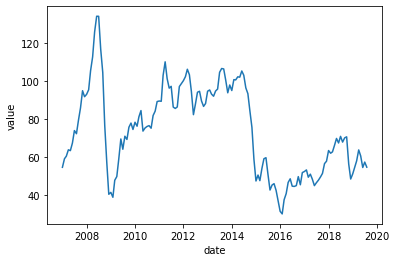

In [112]:
sns.lineplot('date','value',data=onmp)

In [117]:
txt_up = onmp.loc[onmp.date<='2018-03'].news.sum()
txt_dn = onmp.loc[(onmp.date >='2018-08') & (onmp.date <= '2018-12')].news.sum()

In [115]:
type(txt)

str

In [139]:
txt_up = re.sub('said|say','',txt_up)

In [140]:
txt_dn = re.sub('said|say','',txt_dn)

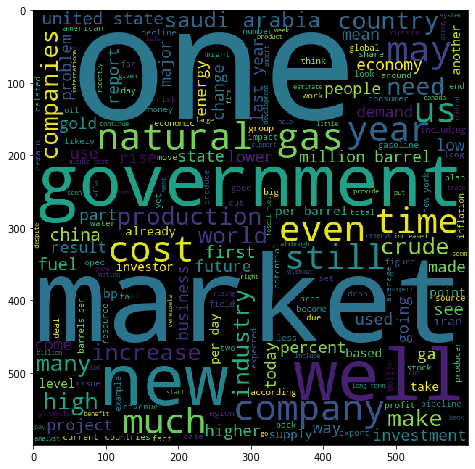

In [141]:
wc(txt_up)

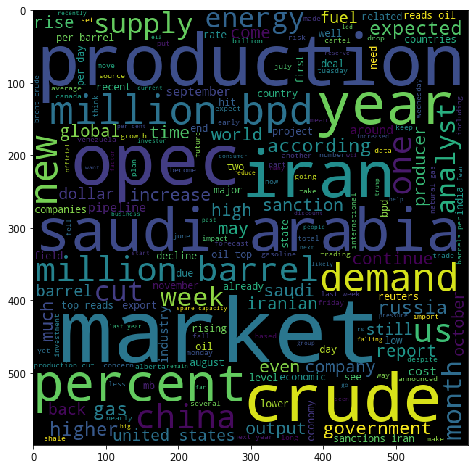

In [142]:
wc(txt_dn)

In [152]:
mod2.wv.similar_by_word('china',topn=3)

[('india', 0.6329286098480225),
 ('japan', 0.6222871541976929),
 ('asia', 0.531912088394165)]

In [154]:
mod2.wv.similar_by_word('saudi',topn=3)

[('ios', 0.6774449944496155),
 ('u.s.-saudi', 0.468794047832489),
 ('boe/d', 0.42599135637283325)]

In [155]:
mod2.wv.similar_by_word('gas',topn=3)

[('beauty', 0.6989237070083618),
 ('magnet', 0.5865404605865479),
 ('disasters', 0.5474894046783447)]

In [157]:
mod2.wv.similar_by_word('government',topn=3)

[('kremlin', 0.6006243824958801),
 ('authorities', 0.5562889575958252),
 ('ruling', 0.488073468208313)]

In [164]:
mod2.wv.most_similar(positive=['crude'],negative=['natural'],topn=3)

[('gas', 0.32966724038124084),
 ('wti', 0.3286653161048889),
 ('crudes', 0.31648874282836914)]

In [166]:
mod2.wv.similar_by_word('production',topn=3)

[('output', 0.8529115915298462),
 ('supplies', 0.5202233791351318),
 ('stockpiles', 0.4926430881023407)]

In [171]:
mod2.most_similar(positive=['oil'],negative=['tar'],topn=3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('fob', 0.38037747144699097),
 ('oil—the', 0.3441215753555298),
 ('1965.', 0.33110782504081726)]

In [173]:
mod2.most_similar(positive=['saudi'],negative=['iran'],topn=3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ios', 0.44325873255729675),
 ('lwir', 0.3198983371257782),
 ('impatient', 0.29154136776924133)]

In [185]:
mod2.docvecs.most_similar('201602')

[('201504', 0.5494446754455566),
 ('201410', 0.5479640960693359),
 ('201606', 0.5408474802970886),
 ('201806', 0.5383337140083313),
 ('201705', 0.5149773955345154),
 ('201412', 0.5011880397796631),
 ('201901', 0.4991300106048584),
 ('201411', 0.4989733397960663),
 ('201603', 0.4906889498233795),
 ('201707', 0.4884006083011627)]

In [186]:
mod2.wv.similar_by_word('decline')

[('declines', 0.720219612121582),
 ('rise', 0.7060542106628418),
 ('rebound', 0.6841856837272644),
 ('decrease', 0.672277569770813),
 ('drop', 0.6656098961830139),
 ('increase', 0.6472747325897217),
 ('jump', 0.6396684646606445),
 ('surge', 0.631223201751709),
 ('slide', 0.6236293315887451),
 ('recovery', 0.623052716255188)]

In [191]:
len(mod2.docvecs)

152

In [192]:
mod2_dv = pd.DataFrame([mod2.docvecs[i] for i in range(152)],columns=['v'+str(j+1) for j in range(100)])

In [193]:
mod2_dv.shape

(152, 100)

In [194]:
mod2_dv.to_csv('../data/mod2_dv.csv',index=False)

In [1]:
from gensim.models.doc2vec import Doc2Vec

In [2]:
pwd

'C:\\Users\\jeong\\proj\\nlp_paper\\py'

In [4]:
omod = Doc2Vec.load('../data/oilnws_model_m.model')

In [7]:
omod.docvecs.distances?

Signature: omod.docvecs.distances(d1, other_docs=())
Docstring:
Compute cosine distances from given `d1` to all documents in `other_docs`.

TODO: Accept vectors of out-of-training-set docs, as if from inference.

Parameters
----------
d1 : {str, numpy.ndarray}
    Doctag/index of document.
other_docs : iterable of {str, int}
    Sequence of doctags/indexes.
    If None or empty, distance of `d1` from all doctags in vocab is computed (including itself).

Returns
-------
numpy.array
    Array containing distances to all documents in `other_docs` from input `d1`.
File:      c:\programdata\anaconda3\lib\site-packages\gensim\models\keyedvectors.py
Type:      method


In [14]:
omod.docvecs.distance('200801','200801')

0.0

In [13]:
omod.docvecs.index_to_doctag(0)

'200701'

### 개별기사를 tag로 하여 doc2vec 해보자 

In [15]:
pwd

'C:\\Users\\jeong\\proj\\nlp_paper\\py'

In [25]:
import glob
fn = glob.glob(r'..\data\oilnews*csv')[0]
fn

'..\\data\\oilnews_200701_201909_p3.csv'

In [22]:
import pandas as pd

In [23]:
oilnews = pd.read_csv(fn)

In [26]:
url = "https://paperswithcode.com/sota/image-classification-on-cifar-10"

In [27]:
import requests

In [28]:
from bs4 import BeautifulSoup as soup

In [31]:
from urllib.request import urlopen

In [30]:
print(a)

NameError: name 'a' is not defined